In [91]:
using Random
rng = MersenneTwister(1234)

MersenneTwister(1234)

In [92]:
function schaffer1(x)
    return x.^2;
end

schaffer1 (generic function with 1 method)

In [93]:
function schaffer2(x)
    return (x-2).^2;
end

schaffer2 (generic function with 1 method)

on prend l'ensemble [-10;10] avec 2 décimales après la virgule


on crée un vecteur aléatoire de base 2 et de longueur 16 

selon le mapping, on peut ainsi obtenir le xprime  et aussi determiner le flottant associé entre -10 et 10, on peut commencer à écrire l'algorithme vega et avec une précision de 2 décimales

In [94]:
using Decimals


on a fini par coder cette variable afin qu'elle soit traitable par un algorithme génétique

On va commencer par écrire le code de l'algorithme

In [95]:
function buildinitial(N)
    initial=zeros(N,20)#il y a 20 colonnes car il ya l'index, 16 colonnes pour le codage en 16 bits, la valeur de x et les 2 fonctions objectives
    for i =1:N
        initial[i,1]=i
        
        convert=bitrand(rng, 16) # on fait le mapping
        xprim=Array{Any}(nothing, 1, 16)
        for j=1:16
            xprim[17-j]=convert[17-j]*2^(j-1); #on convertit en ecriture décimal et on parcourt dans le sens inverse pour bien avoir le bon mapping
        end
        xprime=sum(xprim) # on trouve le réel correspondant
        x=-10 + xprime.*(20/(2^16-1))
        rel=parse(Float64,string(round(decimal(x), digits=2))) # on supprime les décimales selon notre précision
        initial[i,2:17]=convert #on va mettre le code binaire qui est de taille 16
        initial[i,18]=rel
        initial[i,19]=schaffer1(rel)
        initial[i,20]=schaffer2(rel)
    end
    return initial
end
    

#On initialise la population initiale
#n=rand(10:20)=20 donc on a une population de 20
N=20
init=buildinitial(N)
@show init

init = [1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 -9.31 86.6761 127.91610000000001; 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 -7.48 55.95040000000001 89.8704; 3.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 -9.78 95.64839999999998 138.76839999999999; 4.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 -0.62 0.3844 6.864400000000001; 5.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 -2.0 4.0 16.0; 6.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.67 32.1489 58.8289; 7.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 9.78 95.64839999999998 60.52839999999999; 8.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 -7.05 49.7025 81.90250000000002; 9.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 7.08 50.126400000000004 25.8064; 10.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 -1.82 3.31240000000000

20×20 Matrix{Float64}:
  1.0  0.0  0.0  0.0  0.0  1.0  0.0  …  1.0  1.0  -9.31  86.6761  127.916
  2.0  0.0  0.0  1.0  0.0  0.0  0.0     1.0  1.0  -7.48  55.9504   89.8704
  3.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  -9.78  95.6484  138.768
  4.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0  -0.62   0.3844    6.8644
  5.0  0.0  1.0  1.0  0.0  0.0  1.0     1.0  0.0  -2.0    4.0      16.0
  6.0  0.0  0.0  1.0  1.0  0.0  1.0  …  0.0  1.0  -5.67  32.1489   58.8289
  7.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0   9.78  95.6484   60.5284
  8.0  0.0  0.0  1.0  0.0  0.0  1.0     1.0  1.0  -7.05  49.7025   81.9025
  9.0  1.0  1.0  0.0  1.0  1.0  0.0     0.0  0.0   7.08  50.1264   25.8064
 10.0  0.0  1.0  1.0  0.0  1.0  0.0     1.0  1.0  -1.82   3.3124   14.5924
 11.0  0.0  0.0  1.0  1.0  1.0  0.0  …  0.0  1.0  -5.61  31.4721   57.9121
 12.0  1.0  1.0  0.0  1.0  1.0  1.0     0.0  0.0   7.46  55.6516   29.8116
 13.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  1.0  -6.75  45.5625   76.5625
 14.0  

In [96]:
using Plots

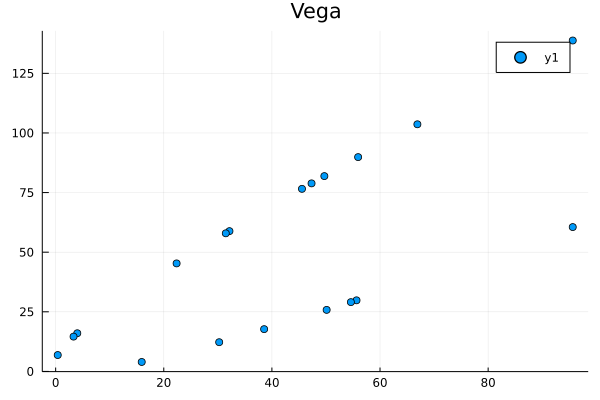

In [97]:
x=init[:,19]
y=init[:,20]
plot(x,y,
    title ="Vega",
    legend = true,
    seriestype = :scatter)

On va procéder à la partie croosover qui consiste à subdiviser le tableau en sous tablea, on prendra deux sous-tableaux et de prendre le minimum des deux fonctions

on va ranger les minimums de schaffer1 et schaffer2 calculées dans builtinitial
de plus petit au plus grand en 2 tableau afin d'avoir les deux parents

on a ainsi realiser l'étape du pickindividual, maintenant on va passer au shuffle

In [98]:
#on va créer une matrice avec les deux sous-tableaux contenant les plus petites valeurs de schaffer1 et schaffer2 qui sont classées en les concaténant
function subgenerate(initialisation,N)
    subpop1=sortslices(initialisation, dims=1, by = x -> x[19]) #on trie le 1er groupe avec les 10 meilleurs résulats de schaffer1
    subpop2=sortslices(initialisation, dims=1,by = x -> x[20]) #on fait de même pour schaffer2
    subpop=vcat(subpop1[1:div(N,2),:], subpop2[1:div(N,2),:]) #on a un ensemble découpé en 2 parties et on les concaténe
    for i=1:N
        subpop[i,1]=i #on remet à jour les indexs
    end
    return subpop
end

@show cross=subgenerate(init,N)

cross = subgenerate(init, N) = [1.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 -0.62 0.3844 6.864400000000001; 2.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 -1.82 3.3124000000000002 14.592400000000001; 3.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 -2.0 4.0 16.0; 4.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.99 15.920100000000001 3.960100000000001; 5.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 -4.73 22.372900000000005 45.2929; 6.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 5.5 30.25 12.25; 7.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.61 31.472100000000005 57.9121; 8.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.67 32.1489 58.8289; 9.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 6.21 38.564099999999996 17.7241; 10.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 -6.75 45.56

20×20 Matrix{Float64}:
  1.0  0.0  1.0  1.0  1.0  1.0  0.0  …  0.0  1.0  -0.62   0.3844   6.8644
  2.0  0.0  1.0  1.0  0.0  1.0  0.0     1.0  1.0  -1.82   3.3124  14.5924
  3.0  0.0  1.0  1.0  0.0  0.0  1.0     1.0  0.0  -2.0    4.0     16.0
  4.0  1.0  0.0  1.0  1.0  0.0  0.0     0.0  0.0   3.99  15.9201   3.9601
  5.0  0.0  1.0  0.0  0.0  0.0  0.0     1.0  0.0  -4.73  22.3729  45.2929
  6.0  1.0  1.0  0.0  0.0  0.0  1.0  …  0.0  0.0   5.5   30.25    12.25
  7.0  0.0  0.0  1.0  1.0  1.0  0.0     0.0  1.0  -5.61  31.4721  57.9121
  8.0  0.0  0.0  1.0  1.0  0.0  1.0     0.0  1.0  -5.67  32.1489  58.8289
  9.0  1.0  1.0  0.0  0.0  1.0  1.0     0.0  0.0   6.21  38.5641  17.7241
 10.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  1.0  -6.75  45.5625  76.5625
 11.0  1.0  0.0  1.0  1.0  0.0  0.0  …  0.0  0.0   3.99  15.9201   3.9601
 12.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0  -0.62   0.3844   6.8644
 13.0  1.0  1.0  0.0  0.0  0.0  1.0     0.0  0.0   5.5   30.25    12.25
 14.0  0.0  1.0  1.0  

In [99]:
function melanger(cross,N)
    matmixer=zeros(N,20) #on créé la nouvelle matrice où on va réaliser le brassage 
    u=shuffle(cross[:,1]) #on mélange les index
    for i=1:N #N=20 ici
        for j=1:N
            if u[i]==cross[j,1] #on parcourt tous les indexs afin de les arranger dans la nouvelle matrice
                matmixer[i,:]=cross[j,:] #on attribut toute la ligne correspondante de la matrice et on les reclasse par index
            end
        end
    end
    for i=1:N
        matmixer[i,1]=i #on remet à jour les indexs et la mtrice est mélangée par ligne
    end
    return matmixer
end
@show matmixer=melanger(cross,20)
@show melanger(cross,20)[:,1]

matmixer = melanger(cross, 20) = [1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.46 55.6516 29.8116; 2.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 -4.73 22.372900000000005 45.2929; 3.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 -2.0 4.0 16.0; 4.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 7.08 50.126400000000004 25.8064; 5.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 -0.62 0.3844 6.864400000000001; 6.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.61 31.472100000000005 57.9121; 7.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.67 32.1489 58.8289; 8.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 -0.62 0.3844 6.864400000000001; 9.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 -6.75 45.5625 76.5625; 10.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 -1.82 3.3124000000000002 14.592400000

20-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
 14.0
 15.0
 16.0
 17.0
 18.0
 19.0
 20.0

On va initialiser la probabilité de crossover et de de mutation

on pose Pc=0.65 et Pm=0.1

In [100]:
Pc=0.65
Pm=0.1 #on va parcourir le tableau de 2 en 2 et obtenir les parents
function crossingParents(matmixer,Pc,N)
    enfant=zeros(N,20) #on créé une nouvelle matrice pour stocker les nouvelles valeurs de x et schaffer1 et schaffer2
    
    for i=1:2:N-1 #on parcourt de 2 en 2 le tableau matmixer
        
        if rand(1)[1]<= Pc #on véerifie que l'on puisse faire le crossover
            
            cut=rand((2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) #on va modifier le code binaire car il est codé en 16 bits et on va de 2 à 17 selon les cases de notre matrice car la collone 1 est l'index
            matmixer[i,cut:17], matmixer[i+1,cut:17]= matmixer[i+1,cut:17], matmixer[i,cut:17] #on effectue le crossing jusqu'à 17 car au_dela on toucherait au colonnes qui ne correspondent pas aux bits
            # il faut recalculer les x en les convertissant au bon fromat décimal car le code binaire à changé
        end
    end
    
    for i=1:N #on va recalculer x, schaffer1 etschaffer2 car le code binaire a changé dû au crossover des parents
        xprim=Array{Any}(nothing, 1, 16)
        for j=1:16
            xprim[17-j]=matmixer[i,18-j]*2^(j-1); #notre code binaire correspondant aux colonnes allant de 2 à 17, donc on commence à j+1
        end
        
        xprime=sum(xprim)
        x=-10 + xprime.*(20/(2^16-1))#on reconvertit la variable
        rel=parse(Float64,string(round(decimal(x), digits=2)))
        enfant[i,18]=rel #on remet le x calculé
        enfant[i,1:17]=matmixer[i,1:17]
        enfant[i,19],enfant[i,20]= schaffer1(rel),schaffer2(rel) #on affiche les nouvelles valeurs de x et des 2 fonctions objectives
    end
    return enfant
end
@show crossParents=crossingParents(matmixer,0.65,N)

crossParents = crossingParents(matmixer, 0.65, N) = [1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 7.46 55.6516 29.8116; 2.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 -4.73 22.372900000000005 45.2929; 3.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 -1.98 3.9204 15.8404; 4.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 7.06 49.843599999999995 25.603599999999997; 5.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 -0.62 0.3844 6.864400000000001; 6.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.61 31.472100000000005 57.9121; 7.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.67 32.1489 58.8289; 8.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 -0.62 0.3844 6.864400000000001; 9.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 -6.82 46.51240000000001 77.7924; 10.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.

20×20 Matrix{Float64}:
  1.0  1.0  1.0  0.0  1.0  1.0  1.0  …  0.0  0.0   7.46  55.6516  29.8116
  2.0  0.0  1.0  0.0  0.0  0.0  0.0     1.0  0.0  -4.73  22.3729  45.2929
  3.0  0.0  1.0  1.0  0.0  0.0  1.0     0.0  0.0  -1.98   3.9204  15.8404
  4.0  1.0  1.0  0.0  1.0  1.0  0.0     1.0  0.0   7.06  49.8436  25.6036
  5.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0  -0.62   0.3844   6.8644
  6.0  0.0  0.0  1.0  1.0  1.0  0.0  …  0.0  1.0  -5.61  31.4721  57.9121
  7.0  0.0  0.0  1.0  1.0  0.0  1.0     0.0  1.0  -5.67  32.1489  58.8289
  8.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  1.0  -0.62   0.3844   6.8644
  9.0  0.0  0.0  1.0  0.0  1.0  0.0     1.0  1.0  -6.82  46.5124  77.7924
 10.0  0.0  1.0  1.0  0.0  1.0  0.0     0.0  1.0  -1.75   3.0625  14.0625
 11.0  1.0  1.0  0.0  0.0  0.0  1.0  …  0.0  1.0   5.52  30.4704  12.3904
 12.0  1.0  1.0  0.0  1.0  1.0  1.0     0.0  0.0   7.38  54.4644  28.9444
 13.0  0.0  1.0  1.0  0.0  0.0  1.0     1.0  0.0  -2.0    4.0     16.0
 14.0  1.0  1.0  0

mutation = mutate(crossParents, Pm, N) = [1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 7.47 55.8009 29.920899999999996; 2.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 -4.73 22.372900000000005 45.2929; 3.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 -1.98 3.9204 15.8404; 4.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 7.06 49.843599999999995 25.603599999999997; 5.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 -0.62 0.3844 6.864400000000001; 6.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.61 31.472100000000005 57.9121; 7.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 -5.67 32.1489 58.8289; 8.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 -0.62 0.3844 6.864400000000001; 9.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 -6.82 46.51240000000001 77.7924; 10.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.

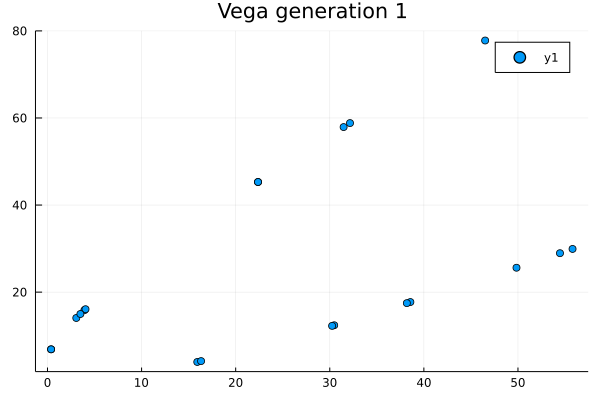

In [101]:
Pc=0.65
Pm=0.1 #on va parcourir le tableau en ligne et voir si il y a eu des mutations auprès de chaque enfant
function mutate(crossParents,Pm,N)
    mutate=zeros(N,20) #on créé une nouvelle matrice pour stocker les nouvelles valeurs de x et schaffer1 et schaffer2
    
    for i=1:N #on parcourt le tableau où il y a les enfants
        
        if rand(1)[1]<= Pm #on vérifie si il y a une mutation
            
            cut=rand((2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) #on va modifier le code binaire car il est codé en 16 bits et on va de 2 à 17 selon les cases de notre matrice car la colonne 1 est l'index
            if crossParents[i,cut]== 0
                crossParents[i,cut]= 1 #on effectue la mutation en échangant le 1 par un 0 ou inversement
            else
                crossParents[i,cut]=0
            end
        end
    end
    
    for i=1:N #on va recalculer x, schaffer1 etschaffer2 car le code binaire a changé dû aux potentielles mutations
        xprim=Array{Any}(nothing, 1, 16)
        for j=1:16
            xprim[17-j]=crossParents[i,18-j]*2^(j-1); #notre code binaire correspondant aux colonnes allant de 2 à 17, donc on commence à j+1
        end
        
        xprime=sum(xprim)
        x=-10 + xprime.*(20/(2^16-1)) #on reconvertit la variable
        rel=parse(Float64,string(round(decimal(x), digits=2)))
        mutate[i,18]=rel #on remet le x calculé
        mutate[i,1:17]=crossParents[i,1:17]
        mutate[i,19],mutate[i,20]= schaffer1(rel),schaffer2(rel) #on affiche les nouvelles valeurs de x et des 2 fonctions objectives
    end
    return mutate
end
@show mutation=mutate(crossParents,Pm,N)

x=mutation[:,19] #qui correspond à z1
y=mutation[:,20]# qui correspond à z2
plot(x,y,
    title ="Vega generation 1",
    legend = true,
    seriestype = :scatter)

on va maintenant faire un algorithme qui va permettre de simuler la sélection au fur et à mesure des générations

newpeople = Vegagenetic(40, 0.6, 0.15, 100) = Plot{Plots.GRBackend() n=2}


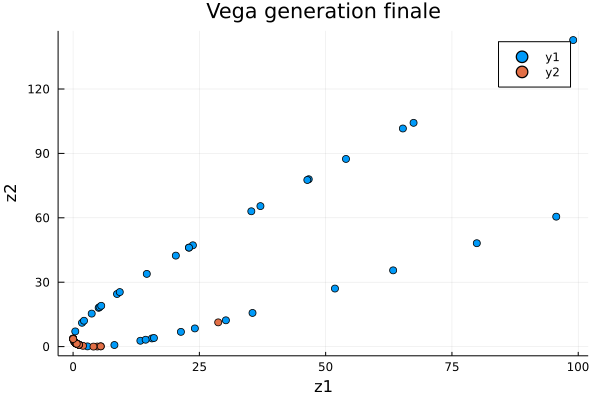

In [102]:
function Vegagenetic(N,Pc,Pm,nbgen) # N-> nbr d'individu, Pc et Pm sont les probabilitées de crossing et mutation et nbgen le nombre de génération
    pop=buildinitial(N)
    x=pop[:,19] #qui correspond à z1
    y=pop[:,20]# qui correspond à z2
    plot1=plot(x,y,
    title ="Vega generation 1",
    legend = true,
    seriestype = :scatter)
    for i=1:nbgen
        cross=subgenerate(pop,N)
        matmixer=melanger(cross,N)
        enfant=crossingParents(matmixer,Pc,N)
        pop=mutate(enfant,Pm,N)
    end
    z=pop[:,19] #qui correspond à z1
    w=pop[:,20]# qui correspond à z2
    plot!(plot1,z,w,
    title ="Vega generation finale",
    legend = true,
    seriestype = :scatter)
    xlabel!(plot1, "z1")
    ylabel!(plot1, "z2")
end

@show newpeople=Vegagenetic(40,0.6,0.15,100)


on va mesurer le temps de calcul en fonction du nombre de population et du nombre de génération

In [103]:
#on fait varier le nombre de poulation vace les autres paramètres fixées
@time begin
  t1=Vegagenetic(10,0.65,0.15,50)
end

@time begin
  t2=Vegagenetic(50,0.65,0.15,50)
end

@time begin
  t3=Vegagenetic(100,0.65,0.15,50)
end

@time begin
  t4=Vegagenetic(200,0.65,0.15,50)
end

println("t1")


  0.035487 seconds (193.16 k allocations: 6.460 MiB)
  0.168057 seconds (1.01 M allocations: 31.545 MiB)
  0.388152 seconds (2.02 M allocations: 62.483 MiB, 10.76% gc time)
  0.793414 seconds (3.93 M allocations: 122.087 MiB, 13.40% gc time)
t1


In [104]:
#on fait varier cette fois-ci le nombre de génération
@time begin
  t1=Vegagenetic(50,0.65,0.15,5)
end

@time begin
  t2=Vegagenetic(50,0.65,0.15,20)
end

@time begin
  t3=Vegagenetic(50,0.65,0.15,50)
end

@time begin
  t4=Vegagenetic(50,0.65,0.15,100)
end

@time begin
  t5=Vegagenetic(50,0.65,0.15,200)
end
print("t1")

  0.022086 seconds (112.81 k allocations: 3.701 MiB)
  0.067778 seconds (405.54 k allocations: 12.786 MiB)
  0.165312 seconds (1.02 M allocations: 31.518 MiB)
  0.391478 seconds (2.05 M allocations: 62.718 MiB, 9.33% gc time)
  0.822641 seconds (4.08 M allocations: 124.725 MiB, 13.80% gc time)
t1

l'évolution est quasi-linéaire dans les deux cas selon l'argument que l'on fait varier

In [136]:
#on va travailler sur des paramétres fixées
function Vegageneticmodif(N,Pc,Pm,nbgen) #on modifie juste la fonction pour qu'elle nous retourne le tableau final
    pop=buildinitial(N)
    x=pop[:,19] #qui correspond à z1
    y=pop[:,20]# qui correspond à z2
    plot1=plot(x,y,
    title ="Vega generation 1",
    legend = true,
    seriestype = :scatter)
    for i=1:nbgen
        cross=subgenerate(pop,N)
        matmixer=melanger(cross,N)
        enfant=crossingParents(matmixer,Pc,N)
        pop=mutate(enfant,Pm,N)
    end
    return pop # on a juste rajouté le return pop afin de de visualiser la matrice
    z=pop[:,19] #qui correspond à z1
    w=pop[:,20]# qui correspond à z2
    plot!(plot1,z,w,
    title ="Vega generation finale",
    legend = true,
    seriestype = :scatter)
    xlabel!(plot1, "z1")
    ylabel!(plot1, "z2")
end

#on choisit n=40 pour le nombre d'individu est 100 genération qui est un compromis car il nous permet ainsi de nous approcher des solutions dominées mais converge rapidement vers les valeurs extrêmales
@show  newpeople=Vegageneticmodif(20,0.65,0.15,50)
@show  solutions=newpeople[:,18:20] #on prend une population de 20 pour bien identifier les solutions

newpeople = Vegageneticmodif(20, 0.65, 0.15, 50) = [1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 2.42 5.8564 0.17639999999999995; 2.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.01 1.0201 0.9801; 3.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.81 0.6561000000000001 1.4161; 4.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 2.32 5.3824 0.1023999999999999; 5.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.07 1.1449 0.8648999999999999; 6.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.88 0.7744 1.2544000000000002; 7.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 2.4 5.76 0.15999999999999992; 8.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 2.4 5.76 0.15999999999999992; 9.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.11 0.0121 3.5721; 10.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 2.08 4

20×3 Matrix{Float64}:
 2.42  5.8564  0.1764
 1.01  1.0201  0.9801
 0.81  0.6561  1.4161
 2.32  5.3824  0.1024
 1.07  1.1449  0.8649
 0.88  0.7744  1.2544
 2.4   5.76    0.16
 2.4   5.76    0.16
 0.11  0.0121  3.5721
 2.08  4.3264  0.0064
 0.01  0.0001  3.9601
 2.16  4.6656  0.0256
 0.99  0.9801  1.0201
 2.87  8.2369  0.7569
 0.21  0.0441  3.2041
 1.17  1.3689  0.6889
 0.42  0.1764  2.4964
 0.37  0.1369  2.6569
 1.31  1.7161  0.4761
 0.69  0.4761  1.7161

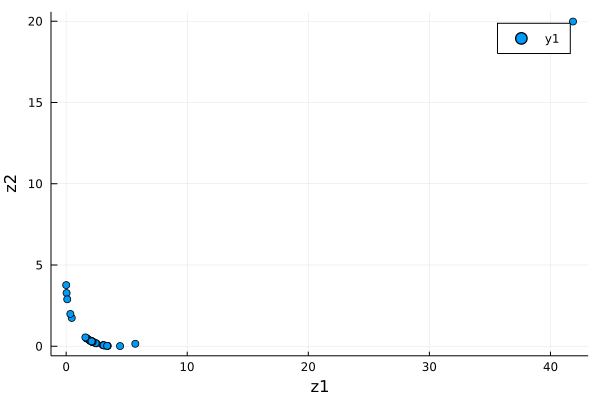

In [132]:
x=solutions[:,2]
y=solutions[:,3]
plot(x,y,
     seriestype= :scatter,
     xlabel="z1",
     ylabel="z2")

In [137]:
#on va chercher une approximation des solutions non_dominées en excluant la valeur extrêmale
n=20 #nombre d'individu choisi
@show maxi1=findmax(solutions[:,2]) #on cherche les points les plus excentrées
@show mini1=findmin(solutions[:,2])
@show maxi2=findmax(solutions[:,3])
@show mini2=findmin(solutions[:,3])
#on va exclure les points minimals et maximales 

function pointnondomine(solutions,maxi1,mini1,maxi2,mini2,n)

    for i=1:n
        if solutions[i,3]< solutions[maxi1[2],3] && solutions[i,2]>solutions[mini2[2],2] #on a une condition sur le fait qu'un point ne soit pas non dominé donc on lui affecte la valeur 0
            solutions[i,:]=zeros(1,size(solutions)[2]) 
        elseif solutions[i,2] < solutions[maxi2[2],2] && solutions[i,3] > solutions[mini1[2],3] #on a une seconde condition sur le fait qu'un point ne soit pas non dominé donc on lui affecte la valeur 0
            solutions[i,:]=zeros(1,size(solutions)[2])
        end
    end
    solutions[maxi1[2],:]=zeros(1,size(solutions)[2]) 
    solutions[maxi2[2],:]=zeros(1,size(solutions)[2]) #les valeurs max sont trivialement dominées
    return solutions
end


maxi1 = findmax(solutions[:, 2]) = (8.2369, 14)
mini1 = findmin(solutions[:, 2]) = (0.0001, 11)
maxi2 = findmax(solutions[:, 3]) = (3.9601, 11)
mini2 = findmin(solutions[:, 3]) = (0.006400000000000012, 10)


pointnondomine (generic function with 2 methods)

l = pointnondomine(solutions, maxi1, mini1, maxi2, mini2, n) = [0.0 0.0 0.0; 1.01 1.0201 0.9801; 0.81 0.6561000000000001 1.4161; 0.0 0.0 0.0; 1.07 1.1449 0.8648999999999999; 0.88 0.7744 1.2544000000000002; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.11 0.0121 3.5721; 2.08 4.3264000000000005 0.006400000000000012; 0.0 0.0 0.0; 0.0 0.0 0.0; 0.99 0.9801 1.0201; 0.0 0.0 0.0; 0.21 0.04409999999999999 3.2041; 1.17 1.3688999999999998 0.6889000000000001; 0.42 0.17639999999999997 2.4964000000000004; 0.37 0.1369 2.6569; 1.31 1.7161000000000002 0.4760999999999999; 0.69 0.4760999999999999 1.7161000000000002]


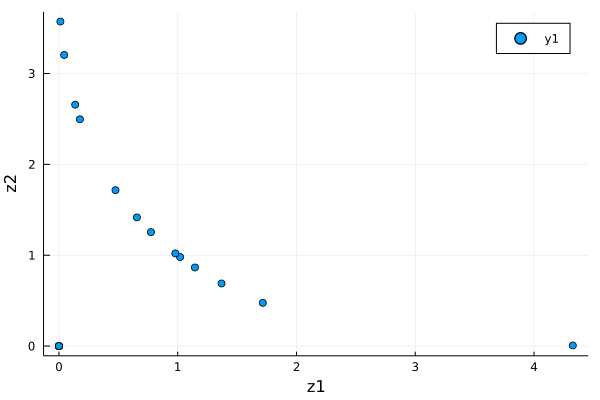

In [138]:

@show l=pointnondomine(solutions,maxi1,mini1,maxi2,mini2,n)
x=l[:,2]
y=l[:,3]
plot(x,y,
     seriestype= :scatter,
     xlabel="z1",
     ylabel="z2")


In [139]:
l=sortslices(l,dims=1, by= x->x[2])

20×3 Matrix{Float64}:
 0.0   0.0     0.0
 0.0   0.0     0.0
 0.0   0.0     0.0
 0.0   0.0     0.0
 0.0   0.0     0.0
 0.0   0.0     0.0
 0.0   0.0     0.0
 0.11  0.0121  3.5721
 0.21  0.0441  3.2041
 0.37  0.1369  2.6569
 0.42  0.1764  2.4964
 0.69  0.4761  1.7161
 0.81  0.6561  1.4161
 0.88  0.7744  1.2544
 0.99  0.9801  1.0201
 1.01  1.0201  0.9801
 1.07  1.1449  0.8649
 1.17  1.3689  0.6889
 1.31  1.7161  0.4761
 2.08  4.3264  0.0064

mise à part les valeurs en 0, on a ainsi l'ensemble des solutions non dominées pour l'intervalle [-10,10] avec une approximation de 2 décimales